In [1]:
import pandas as pd
import numpy as np

In [2]:


# خواندن داده‌ها
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
# data = pd.read_csv(url, names=columns)
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv('./iris.data', header=None, names=column_names)

# نمایش چند نمونه از داده‌ها
data.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


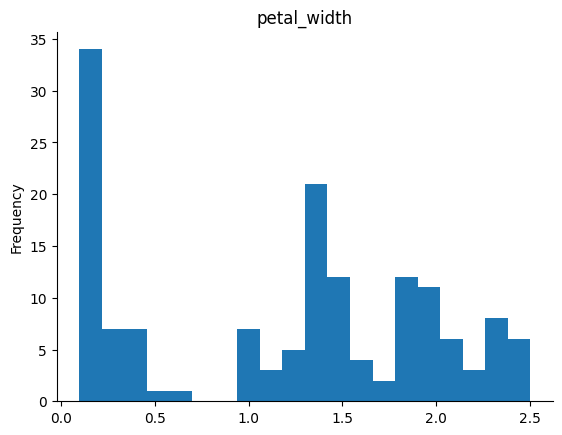

In [3]:

from matplotlib import pyplot as plt
data['petal_width'].plot(kind='hist', bins=20, title='petal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

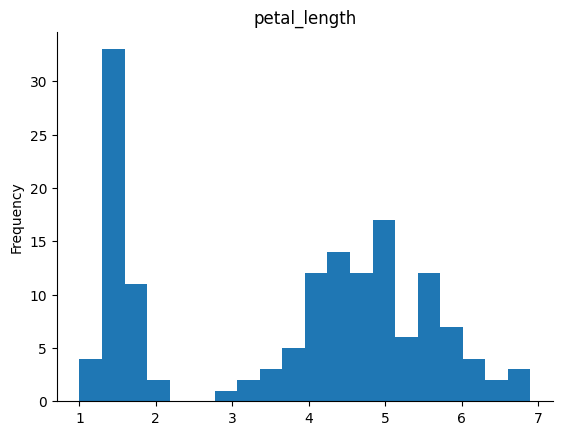

In [11]:

from matplotlib import pyplot as plt
data['petal_length'].plot(kind='hist', bins=20, title='petal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

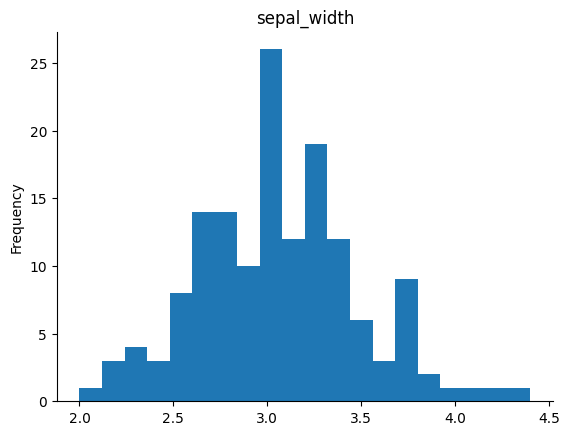

In [7]:

from matplotlib import pyplot as plt
data['sepal_width'].plot(kind='hist', bins=20, title='sepal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

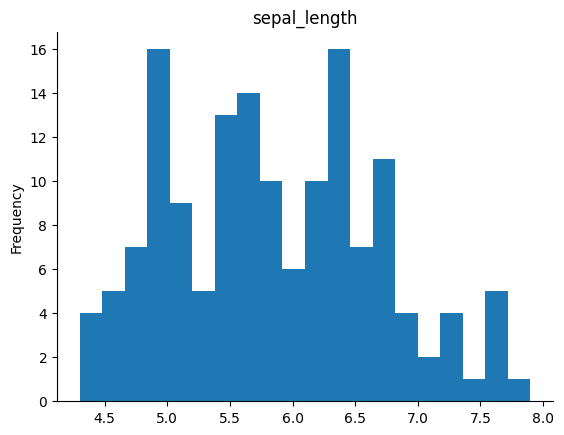

In [6]:

from matplotlib import pyplot as plt
data['sepal_length'].plot(kind='hist', bins=20, title='sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [3]:
# نمایش تعداد رکوردها
print(f" {len(data)} records")

 150 records


In [3]:

def entropy(column):
    """محاسبه آنتروپی برای یک ستون"""
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

In [18]:
# محاسبه کاهش آنتروپی (Information Gain)

def InfoGain(data, split_attribute_name, target_name="class"):
    # محاسبه آنتروپی کل
    total_entropy = entropy(data[target_name])

    # مقادیر منحصر به فرد ویژگی
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    print(f'Values : {vals}, \n\nCounts : {counts}\n')

    # data.where(data['Feature1'] == 'A').dropna()['Target'] --> ['Yes', 'Yes', 'No']
    #entropy(['Yes', 'Yes', 'No'])
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[split_attribute_name] == vals[i]).dropna()[target_name]) for i in range(len(vals))])

    # کاهش آنتروپی
    Information_Gain = total_entropy - weighted_entropy
    return Information_Gain


In [14]:
# # ایجاد یک دیتافریم نمونه
# data_test = pd.DataFrame({
#     'Feature1': ['A', 'A', 'A', 'B', 'B', 'B'],
#     'Target': ['Yes', 'Yes', 'No', 'No', 'No', 'Yes']
# })

# # محاسبه سود اطلاعاتی برای Feature1
# info_gain = InfoGain(data_test, 'Feature1', 'Target')
# print(f"Information Gain for Feature1: {info_gain}")

values : ['A' 'B'], counts : [3 3]
Information Gain for Feature1: 0.08170416594551044


In [19]:
features = data.columns[:-1]  # همه ستون‌ها به جز ستون آخر که Target است
information_gains = {}
for feature in features:
    ig = InfoGain(data, feature, target_name="class")
    information_gains[feature] = ig

    print(f"Information Gain ➡️ {feature}: {ig}\n ")
    print("-------------------------")

Values : [4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.6 7.7 7.9], 

Counts : [ 1  3  1  4  2  5  6 10  9  4  1  6  7  6  8  7  3  6  6  4  9  7  5  2
  8  3  4  1  1  3  1  1  1  4  1]

Information Gain ➡️ sepal_length: 0.8769376208910578
 
-------------------------
Values : [2.  2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8
 3.9 4.  4.1 4.2 4.4], 

Counts : [ 1  3  4  3  8  5  9 14 10 26 12 13  6 12  6  3  3  6  2  1  1  1  1]

Information Gain ➡️ sepal_width: 0.5108699641236063
 
-------------------------
Values : [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 3.  3.3 3.5 3.6 3.7 3.8 3.9 4.  4.1
 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.3 6.4 6.6 6.7 6.9], 

Counts : [ 1  1  2  7 12 14  7  4  2  1  2  2  1  1  1  3  5  3  4  2  4  8  3  5
  4  5  4  8  2  2  2  3  6  3  3  2  2  3  1  1  1  2  1]

Information Gain ➡️ petal_length: 1.4463165236458

In [8]:
best_feature = max(information_gains, key=information_gains.get)
print(f"Highest Information Gain: {best_feature}")


Highest Information Gain: petal_length


In [26]:
def ID3(data, original_data, features, target_attribute_name="class", parent_node_class=None, level=0):

    """
    data : changable
    original_data : fixed

    """
    indent = "  " * level
    

    # Check the terminated conditions
    
    """
    # 1. If data is empty, then:
    #     1.1 Return parent_node_class
    """


    if len(data) == 0:
        print(f"{indent}  Leaf: {parent_node_class}")
        return parent_node_class
    
    # 2. If all target values are the same in data, then:
    #   2.1 Return the single target value
    
 
    elif len(np.unique(data[target_attribute_name])) <= 1:
        unique_class = np.unique(data[target_attribute_name])[0]    # data[target_attribute_name] = [1, 1, 1, 1] --> then fist element([0]) of this array is 1

        print(f"{indent}  Leaf: {unique_class}")
        return unique_class
    
    # 3. If features is empty, then:
    #    3.1 Return the most common target value in the original_data
    

    elif len(features) == 0:
        # ['Yes', 'No', 'Yes', 'Yes', 'No']
        # original_data[target_attribute_name], return_counts=True) --> (array(['Yes', 'No']), array([3, 2]))
        #np.unique(original_data[target_attribute_name], return_counts=True)[1] -->[3,2]
        #[np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])] --> 💡maximum argemnrt of array is 0 because of 3 in [3,2]

        majority_class = np.unique(original_data[target_attribute_name])[np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])]
        print(f"{indent}  Leaf: {majority_class}")
        return majority_class
    

    else:
        # create subset
        # The most frequent class
        
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]

        # The most frequent feature

        item_values = [InfoGain(data, feature, target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        tree = {best_feature: {}}
        print(f"{indent}Node: {best_feature}")

        remaining_features = [i for i in features if i != best_feature]
        for value in np.unique(data[best_feature]):
            sub_data = data.where(data[best_feature] == value).dropna()
            print(f"{indent}  Creating subtree for {best_feature} = {value}")
            subtree = ID3(sub_data, data, remaining_features, target_attribute_name, parent_node_class, level + 1)
            tree[best_feature][value] = subtree
        return tree


In [19]:
import graphviz

def plot_tree(tree, parent=None, parent_value=None, graph=None):
    if graph is None:
        graph = graphviz.Digraph(node_attr={'fontsize': '12', 'shape': 'ellipse', 'style': 'filled', 'color': 'lightblue'},
                                 edge_attr={'fontsize': '10'})
        graph.attr(size='30,30', dpi='600')
    if isinstance(tree, dict):
        feature = list(tree.keys())[0]
        if parent is not None:
            graph.node(feature, label=feature, shape='ellipse', style='filled', color='#66c2a5')
            graph.edge(parent, feature, label=str(parent_value))
        for value, subtree in tree[feature].items():
            plot_tree(subtree, feature, value, graph)
    else:
        class_label = str(tree)
        graph.node(class_label, label=class_label, shape='box', style='filled', color='#fc8d62')
        if parent is not None:
            graph.edge(parent, class_label, label=str(parent_value))

    return graph

In [27]:

tree = ID3(data, data, features)


Node: petal_length
  Creating subtree for petal_length = 1.0
    Leaf: Iris-setosa
  Creating subtree for petal_length = 1.1
    Leaf: Iris-setosa
  Creating subtree for petal_length = 1.2
    Leaf: Iris-setosa
  Creating subtree for petal_length = 1.3
    Leaf: Iris-setosa
  Creating subtree for petal_length = 1.4
    Leaf: Iris-setosa
  Creating subtree for petal_length = 1.5
    Leaf: Iris-setosa
  Creating subtree for petal_length = 1.6
    Leaf: Iris-setosa
  Creating subtree for petal_length = 1.7
    Leaf: Iris-setosa
  Creating subtree for petal_length = 1.9
    Leaf: Iris-setosa
  Creating subtree for petal_length = 3.0
    Leaf: Iris-versicolor
  Creating subtree for petal_length = 3.3
    Leaf: Iris-versicolor
  Creating subtree for petal_length = 3.5
    Leaf: Iris-versicolor
  Creating subtree for petal_length = 3.6
    Leaf: Iris-versicolor
  Creating subtree for petal_length = 3.7
    Leaf: Iris-versicolor
  Creating subtree for petal_length = 3.8
    Leaf: Iris-versicol

In [28]:
graph = plot_tree(tree)
graph.view()

'Digraph.gv.pdf'